In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### Convert y_train and y_test from 2d array to 1d array

In [ ]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_img(X, y, idx):
    plt.figure(figsize=(5,2))
    plt.imshow(X[idx])
    plt.xlabel(classes[y[idx]])

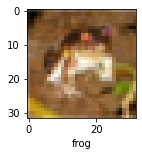

In [ ]:
plot_img(X_train, y_train, 0)

#### Normalize images to a number from 0-1. RGB values can range from 0-225.

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### ANN

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    # softmax- normalise the probability of each class
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 125s 80ms/step - loss: 2.2455 - accuracy: 0.2709
Epoch 2/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.6912 - accuracy: 0.3955
Epoch 3/10
1563/1563 [==============================] - 124s 80ms/step - loss: 1.5911 - accuracy: 0.4284
Epoch 4/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.5226 - accuracy: 0.4555
Epoch 5/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4894 - accuracy: 0.4674
Epoch 6/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4610 - accuracy: 0.4787
Epoch 7/10
1563/1563 [==============================] - 124s 80ms/step - loss: 1.4358 - accuracy: 0.4840
Epoch 8/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4029 - accuracy: 0.4980
Epoch 9/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3777 - accuracy: 0.5038
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.5007 - accuracy: 0.4790


[1.5006829500198364, 0.4790000021457672]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      1000
           1       0.49      0.70      0.58      1000
           2       0.44      0.27      0.33      1000
           3       0.38      0.27      0.31      1000
           4       0.40      0.45      0.43      1000
           5       0.43      0.37      0.40      1000
           6       0.51      0.54      0.52      1000
           7       0.58      0.47      0.52      1000
           8       0.55      0.64      0.59      1000
           9       0.45      0.53      0.49      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



### CNN

In [ ]:
cnn = models.Sequential([
    #cnn layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #dense ann layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.6539 - accuracy: 0.3964
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1160 - accuracy: 0.6100
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9693 - accuracy: 0.6625
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8737 - accuracy: 0.6932
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8066 - accuracy: 0.7182
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7438 - accuracy: 0.7398
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6745 - accuracy: 0.7665
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6272 - accuracy: 0.7827
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.5815 - accuracy: 0.7966
Epoch 10/10
1563/1563 [==============================] - 58s 37m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9654 - accuracy: 0.6915


[0.9654141664505005, 0.6915000081062317]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.82      0.73      1000
           1       0.80      0.82      0.81      1000
           2       0.58      0.58      0.58      1000
           3       0.49      0.53      0.51      1000
           4       0.69      0.55      0.61      1000
           5       0.66      0.54      0.59      1000
           6       0.67      0.82      0.74      1000
           7       0.86      0.66      0.75      1000
           8       0.83      0.78      0.81      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

